#### Dataset Overview
Number of observations in the dataset: total 1071 (303 from Cleaveland, 425 from Hungarian, 143 from Switzerland and 200 from VA)

Number of observations after removing missing values: total 674 (303 from cleaveland, 269 from hungarian and 102 from va)


Number of variables: 15

interpretation of variables of interest: 
- location: location of institutions where patients take angiography, categorical, no missing value
- age: age of the patients in years, numerical, no missing value
- sex: sex of the patients, categorical, no missing value
- cp: chest pain type, 4 types denoted in 0,1,2,3, categorical, no missing value
- trestbps: resting blood pressure (on admission to the hospital) in mm Hg, numerical, has missing values
- chol: serum cholestoral in mg/dl, numerical, has missing values
- restecg: resting electrocardiographic results (values 0,1,2), categorical, has missing values
- num: diagnosis of heart disease (our target variable), 0: no disease and >= 1: disease, categorical, no missing value

Research Question - How accurate can we predict the likelihood of coronary disease(variable 'num') based on location, age, sex, chest pain type, resting blood pressure, serum cholesterol, and resting ECG results of the patients from four specific regions?

Our analysis will involve the development of a predictive model to estimate the likelihood of angiographic coronary disease based on these variables. Additionally, we will explore regional variations and demographic influences on heart disease risk. This research question is focused on both prediction, as we seek to build a predictive model, and inference, as we aim to gain insights into the factors influencing the likelihood of coronary disease diagnosis in different locations and demographic groups. 

In terms of the data, we will remove the missing values in data wrangling process in later assignment. Since all of the "chol" from patients' data in Switzerland are missing, in later data analysis step we expect our "location" variable to contain only 3 categories.

Reasons for my variable selection: 
Variables of interest: location, age, sex, cp, trestbps, chol, restecg, and num(response variable).

My choice of variables is guided by the need to conduct a comprehensive investigation into the likelihood of angiographic coronary disease across diverse clinical settings. I selected 'location' to account for potential regional disparities in healthcare practices. 'Age' and 'sex' are fundamental demographic factors widely recognized for their influence on heart diseases. 'Chest Pain Type' (cp), 'Resting Blood Pressure' (trestbps), 'Serum Cholesterol' (chol), and 'Resting ECG Results' (restecg) are included due to their clinical relevance as diagnostic indicators. The variable 'num' (diagnosis of heart disease) is our response variable, central to the research question, to predict coronary disease likelihood. This selection of variables collectively enables us to explore the associations and regional variations in coronary disease, aiming to develop predictive models for informed decision-making and risk assessment.

#### Clean and wrangle the data

Note: The major step of data cleaning had been done in the assignment 1, and I provided that part of code by the end of this notebook.

In [24]:
# load the required packages
library("tidyverse")
library("dplyr")
library("gridExtra")

In [2]:
# read the data from github
heart <- read.csv("https://raw.githubusercontent.com/HanxiMarkC/Heart-Disease-Angiography/main/data/heart_tidy.csv")

In [3]:
head(heart)
dim(heart)

,X,location,age,sex,cp,trestbps,chol,restecg,num
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,cleaveland,63,1,1,145,233,2,0
2,2,cleaveland,67,1,4,160,286,2,2
3,3,cleaveland,67,1,4,120,229,2,1
4,4,cleaveland,37,1,3,130,250,0,0
5,5,cleaveland,41,0,2,130,204,2,0
6,6,cleaveland,56,1,2,120,236,0,0


[1] 674   9

In [4]:
# drop the missing values
heart <- na.omit(heart)

# count the number of observations for each location
table(heart$location)


cleaveland  hungarian         va 
       303        269        102 

Since for the response variable, patients diagnosed with disease correspond to 'num' >= 1, I will convert all num values that are >=1 to 1, and convert the column in to a factor.

In [5]:
table(heart$num)


  0   1   2   3   4 
356 186  57  57  18 

In [6]:
heart$num <- as.numeric(heart$num) 
heart$num <- ifelse(heart$num == 0, heart$num, 1)
heart$num <- as.factor(heart$num) # convert the response variable into categotical
heart

,X,location,age,sex,cp,trestbps,chol,restecg,num
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1,cleaveland,63,1,1,145,233,2,0
2,2,cleaveland,67,1,4,160,286,2,1
3,3,cleaveland,67,1,4,120,229,2,1
4,4,cleaveland,37,1,3,130,250,0,0
5,5,cleaveland,41,0,2,130,204,2,0
6,6,cleaveland,56,1,2,120,236,0,0
7,7,cleaveland,62,0,4,140,268,2,1
8,8,cleaveland,57,0,4,120,354,0,0
9,9,cleaveland,63,1,4,130,254,2,1


### Exploratory Data Analysis and Visualization

In [25]:
summary(heart)

       X           location              age             sex        
 Min.   :  1.0   Length:674         Min.   :28.00   Min.   :0.0000  
 1st Qu.:169.2   Class :character   1st Qu.:46.00   1st Qu.:0.0000  
 Median :340.5   Mode  :character   Median :54.00   Median :1.0000  
 Mean   :374.9                      Mean   :52.56   Mean   :0.7404  
 3rd Qu.:524.8                      3rd Qu.:59.00   3rd Qu.:1.0000  
 Max.   :920.0                      Max.   :77.00   Max.   :1.0000  
       cp           trestbps          chol          restecg       num    
 Min.   :1.000   Min.   : 92.0   Min.   : 85.0   Min.   :0.0000   0:356  
 1st Qu.:2.000   1st Qu.:120.0   1st Qu.:210.2   1st Qu.:0.0000   1:318  
 Median :4.000   Median :130.0   Median :240.0   Median :0.0000          
 Mean   :3.169   Mean   :132.7   Mean   :247.1   Mean   :0.6469          
 3rd Qu.:4.000   3rd Qu.:140.0   3rd Qu.:275.8   3rd Qu.:1.7500          
 Max.   :4.000   Max.   :200.0   Max.   :603.0   Max.   :2.0000          

Since my research question is predictive (as discussed above), and the response variable is categorical, logistic regression will be applied in future model fitting. Before fitting the model, for exploratory data analysis, we want to check whether there is clear relationship between the predictors and the response. 

In this case, I want to firstly check the relationship between categorical variables and the response: location, sex, cp, and restecg. The barplots below shows the distribution of categorical predictor variables, with colored proportion representing the proportion of response levels at that level of predictor. 

In [26]:
library(ggplot2)
# Create histograms for selected numerical variables colored by 'num'

location_plot <- heart %>%
  select(location,num) %>%  # Select the numerical variables of interest
  ggplot() +
  geom_bar(aes(x = location, fill = num), position = "fill") +
  labs(title = "Barplot of location by diagnosed Heart Disease Status",
       x = "location",
       y = "Proportion",
       fill = "Heart Disease")

sex_plot <- heart %>%
  select(sex,num) %>%  # Select the numerical variables of interest
  ggplot() +
  geom_bar(aes(x = sex, fill = num), position = "fill") +
  labs(title = "Barplot of sex by diagnosed Heart Disease Status",
       x = "sex",
       y = "Proportion",
       fill = "Heart Disease")

cp_plot <- heart %>%
  select(cp,num) %>%  # Select the numerical variables of interest
  ggplot() +
  geom_bar(aes(x = cp, fill = num), position = "fill") +
  labs(title = "Barplot of chest pain type by diagnosed Heart Disease Status",
       x = "chest pain type",
       y = "Proportion",
       fill = "Heart Disease")

restecg_plot <- heart %>%
  select(restecg,num) %>%  # Select the numerical variables of interest
  ggplot() +
  geom_bar(aes(x = restecg, fill = num), position = "fill") +
  labs(title = "Barplot of resting electrocardiographic results by diagnosed Heart Disease Status",
       x = "resting electrocardiographic results",
       y = "Proportion",
       fill = "Heart Disease")

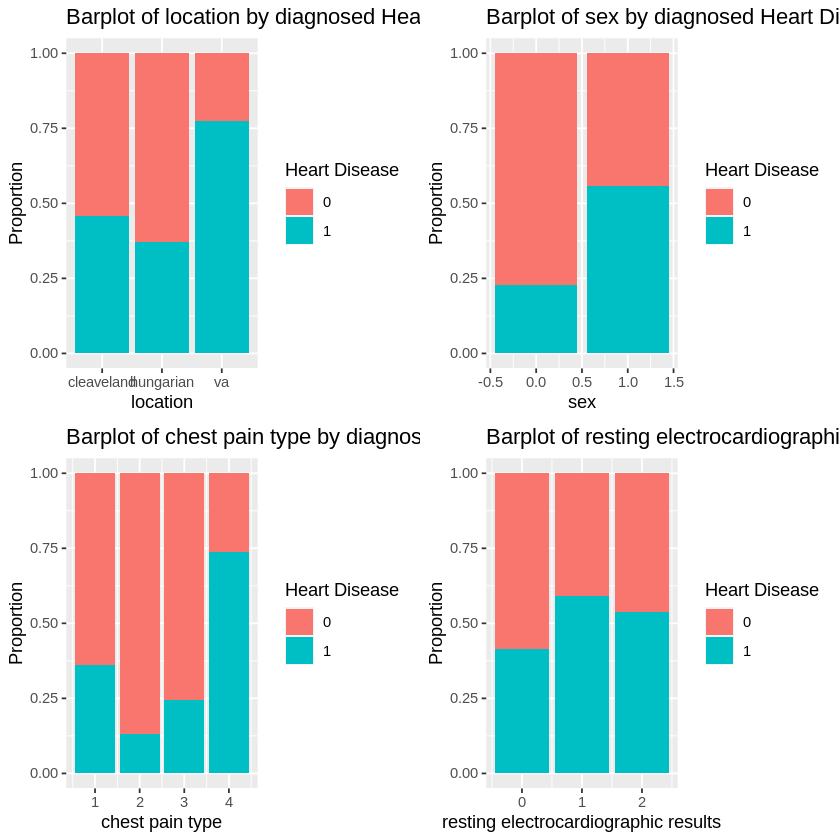

In [27]:
grid.arrange(location_plot, sex_plot, cp_plot, restecg_plot)

In terms of location, the bar plot above can help assess whether the prevalence of coronary disease varies significantly between different institutions or locations. We can see for VA, there is a clear higher proportion of observations diagnosed with heart disease, which implies location may be a useful predictor.

In terms of sex, by visualizing the proportion of coronary disease cases for each gender, we can explore whether there are gender-related differences in disease prevalence. We can see for sex = 1(male) compared with female (sex = 0), there is a higher proportion of males diagnosed with heart disease, this information may suggest that sex is a relevant predictor.

In terms of chest pain type, the bar plots can show how the type of chest pain (categorized into 4 types: 1: typical angina; Value 2: atypical angina; Value 3: non-anginal pain; Value 4: asymptomatic) is related to coronary disease. we can see for asymptomatic type correspond to higher proportion of people with heart disease compared with typical angina, atypical angina and non-anginal pain, which is consensus with professional knowledge. 

"Asymptomatic" chest pain type typically indicates a lack of noticeable symptoms, which can be concerning because it suggests that individuals may have heart disease without experiencing the typical chest pain associated with angina. Thus, a higher proportion of individuals with asymptomatic chest pain having heart disease aligns with the idea that some heart disease cases may not present with obvious symptoms. In contrast, "Typical Angina," "Atypical Angina," and "Non-Anginal Pain" chest pain types are associated with varying degrees of chest discomfort or pain. The fact that these types have a lower proportion of individuals with heart disease is consistent with the expectation that individuals with classic symptoms of angina are more likely to be accurately diagnosed and treated for heart disease. In conclusion, this suggests this variable is also useful for prediction.

In terms of electrocardiographic results, where the levels represents: 0- normal; 1- having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2- showing probable or definite left ventricular hypertrophy by Estes' criteria. There isn't a clear large difference between the levels with proportions of people with heart disease, which indicates it may not be a useful predictor in future models.

Due to the scope of this assignment, we could only make one type of plot. But this type of plot is also useful for check the relationship between numerical predictors and the response, as long as the number of unique values for that response isn't too large. In this case, age is a good example:

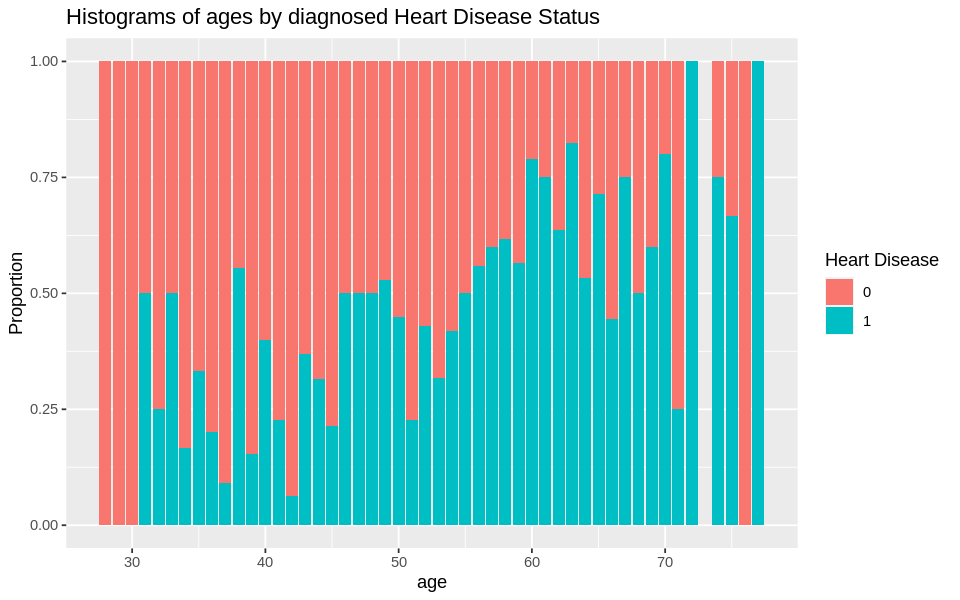

In [28]:
options(repr.plot.width = 8, repr.plot.height = 5)
age_plot <- heart %>%
  select(age,num) %>%  # Select the numerical variables of interest
  ggplot() +
  geom_bar(aes(x = age, fill = num), position = "fill") +
  labs(title = "Histograms of ages by diagnosed Heart Disease Status",
       x = "age",
       y = "Proportion",
       fill = "Heart Disease")
age_plot

Based on the plot above, it is clear that a higher level of age corresponds to a higher proportion of people with coronary disease, which meets the general consensus.

We should also make plots to do EDA for numerical variables, but due to the scope of this assignment, the type of plots is restricted. So this has been done by my group members and to discuss and share our results.

In addition, multi-collinearity is also important in exploratory data analysis. We will check it by the following code.

In [29]:
# Fit a logistic regression model
logistic_model <- glm(num ~ location + age + sex + cp + trestbps + chol + restecg, data = heart, family = binomial)

In [31]:
# Calculate VIF for independent variables
vif_values <- car::vif(logistic_model)
vif_values

,GVIF,Df,GVIF^(1/(2*Df))
location,1.488865,2,1.104622
age,1.296916,1,1.138822
sex,1.120121,1,1.058358
cp,1.025543,1,1.012691
trestbps,1.077798,1,1.038171
chol,1.061876,1,1.030474
restecg,1.239052,1,1.113127


VIF (Variance Inflation Factor) values below 5 or 10 are often considered acceptable in most cases. VIF values closer to 1 indicate lower multicollinearity, and values above 5 or 10 may suggest high multicollinearity. In this case, all VIF values are comfortably close to 1, indicating that there is no substantial multicollinearity among our variables. This is a good sign, as it suggests that the variables we've included in our logistic regression model are not highly correlated with each other, which can lead to stability and reliability in our model's parameter estimates.